# Data Acquisition and Exploration
**Learning Objective:** 
- Get familiar with common data exploration libraries
- Learn to acquire and clean data
- Learn to explore and visualize 



## Acquiring Data
With some Python basics we will start combining existing packages to acquire, and explore data.


In [5]:
# Install requirred libraries
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=cba1b3422efd400c4b8b4489dd299183c306db1d8e0669c8cded053fe5fb9e86
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
# Load the required libraries
import pandas as pd
import wikipedia as wp
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]


In [0]:
# Identify Wikipedia Page and acquire the date
page_title = "Opinion polling for the 2019 Canadian federal election"


In [0]:
#Get the html source
html = wp.page(page_title).html().encode("UTF-8")


In [0]:
# Extract tables and convert the html tables into pd.DataFrame()
df = pd.read_html(html)[0].iloc[2:,:]


## Cleaning Data


In [10]:
# Inspect the data
df.head()


,Polling firm,Last dateof polling[1],Link,LPC,CPC,NDP,BQ,GPC,PPC,Marginof error[2],Samplesize[3],Polling method[4],Lead
,Polling firm,Last dateof polling[1],Link,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Marginof error[2],Samplesize[3],Polling method[4],Lead
2,Nanos Research,"October 20, 2019",PDF,31.7,32.5,20.8,7.2,6.0,1.5,Â±3.6 pp,800,telephone,0.8
3,Mainstreet Research,"October 20, 2019",HTML,31.6,32.2,18.3,7.9,6.1,2.8,Â±2.17 pp,2032,IVR,0.6
4,Research Co.,"October 20, 2019",HTML,32.0,31.0,19.0,7.0,8.0,2.0,Â±3.1 pp,957,online,1.0
5,EKOS,"October 20, 2019",PDF,34.2,30.0,18.3,5.0,8.1,3.5,Â±2.2 pp,1994,telephone/IVR,4.2
6,Campaign Research,"October 20, 2019",HTML,31.4,31.3,17.8,6.6,9.1,2.7,Â±1.4 pp,1498,online (rolling),0.1


In [11]:
# We notice that there seems to be a double header
df.columns


MultiIndex([(          'Polling firm',           'Polling firm'),
            ('Last dateof polling[1]', 'Last dateof polling[1]'),
            (                  'Link',                   'Link'),
            (                   'LPC',     'Unnamed: 3_level_1'),
            (                   'CPC',     'Unnamed: 4_level_1'),
            (                   'NDP',     'Unnamed: 5_level_1'),
            (                    'BQ',     'Unnamed: 6_level_1'),
            (                   'GPC',     'Unnamed: 7_level_1'),
            (                   'PPC',     'Unnamed: 8_level_1'),
            (     'Marginof error[2]',      'Marginof error[2]'),
            (         'Samplesize[3]',          'Samplesize[3]'),
            (     'Polling method[4]',      'Polling method[4]'),
            (                  'Lead',                   'Lead')],
           )

In [12]:
# What is the type of columns
type(df.columns)


pandas.core.indexes.multi.MultiIndex

In [13]:
# Let's use a loop to extract and edit each element of the MultiIndex dataframe
columnn_names = []
for c in df.columns:
    tmp = c[0].lower()
    columnn_names.append(tmp.replace(" ", "_"))

columnn_names


['polling_firm',
 'last_dateof_polling[1]',
 'link',
 'lpc',
 'cpc',
 'ndp',
 'bq',
 'gpc',
 'ppc',
 'marginof_error[2]',
 'samplesize[3]',
 'polling_method[4]',
 'lead']

In [0]:
# Let's use regular expressions in a list comprehension this time
import re
regex = "[a-z]+"
columnn_names = ["_".join(re.findall(regex, i)) for i in columnn_names]


In [15]:
# Let's edit the columns of our dataset
df.columns = columnn_names
df.head()


,polling_firm,last_dateof_polling,link,lpc,cpc,ndp,bq,gpc,ppc,marginof_error,samplesize,polling_method,lead
2,Nanos Research,"October 20, 2019",PDF,31.7,32.5,20.8,7.2,6.0,1.5,Â±3.6 pp,800,telephone,0.8
3,Mainstreet Research,"October 20, 2019",HTML,31.6,32.2,18.3,7.9,6.1,2.8,Â±2.17 pp,2032,IVR,0.6
4,Research Co.,"October 20, 2019",HTML,32.0,31.0,19.0,7.0,8.0,2.0,Â±3.1 pp,957,online,1.0
5,EKOS,"October 20, 2019",PDF,34.2,30.0,18.3,5.0,8.1,3.5,Â±2.2 pp,1994,telephone/IVR,4.2
6,Campaign Research,"October 20, 2019",HTML,31.4,31.3,17.8,6.6,9.1,2.7,Â±1.4 pp,1498,online (rolling),0.1


In [16]:
# Let's further rename those columns
names_dict = {
    "polling_firm": "source",
    "last_dateof_polling": "date",
    "samplesize": "sample_size",
    "marginof_error": "error",
    "cons": "cpc",
    "liberal": "lpc",
    "green": "gpc",
    "polling_method": "method",
}

type(names_dict)


dict

In [17]:
# Pass the new dictionary as an argument to the .rename method
df.rename(columns=names_dict, inplace=True)
df.head()


,source,date,link,lpc,cpc,ndp,bq,gpc,ppc,error,sample_size,method,lead
2,Nanos Research,"October 20, 2019",PDF,31.7,32.5,20.8,7.2,6.0,1.5,Â±3.6 pp,800,telephone,0.8
3,Mainstreet Research,"October 20, 2019",HTML,31.6,32.2,18.3,7.9,6.1,2.8,Â±2.17 pp,2032,IVR,0.6
4,Research Co.,"October 20, 2019",HTML,32.0,31.0,19.0,7.0,8.0,2.0,Â±3.1 pp,957,online,1.0
5,EKOS,"October 20, 2019",PDF,34.2,30.0,18.3,5.0,8.1,3.5,Â±2.2 pp,1994,telephone/IVR,4.2
6,Campaign Research,"October 20, 2019",HTML,31.4,31.3,17.8,6.6,9.1,2.7,Â±1.4 pp,1498,online (rolling),0.1


In [18]:
# Let's check the data types
df.dtypes


source          object
date            object
link            object
lpc            float64
cpc            float64
ndp            float64
bq             float64
gpc            float64
ppc            float64
error           object
sample_size     object
method          object
lead           float64
dtype: object

In [19]:
# The date field needs to be converted
df[['date']] = pd.to_datetime(df.date)
df.head()


,source,date,link,lpc,cpc,ndp,bq,gpc,ppc,error,sample_size,method,lead
2,Nanos Research,2019-10-20,PDF,31.7,32.5,20.8,7.2,6.0,1.5,Â±3.6 pp,800,telephone,0.8
3,Mainstreet Research,2019-10-20,HTML,31.6,32.2,18.3,7.9,6.1,2.8,Â±2.17 pp,2032,IVR,0.6
4,Research Co.,2019-10-20,HTML,32.0,31.0,19.0,7.0,8.0,2.0,Â±3.1 pp,957,online,1.0
5,EKOS,2019-10-20,PDF,34.2,30.0,18.3,5.0,8.1,3.5,Â±2.2 pp,1994,telephone/IVR,4.2
6,Campaign Research,2019-10-20,HTML,31.4,31.3,17.8,6.6,9.1,2.7,Â±1.4 pp,1498,online (rolling),0.1


In [0]:
# We should also only keep the numeric values for the margins of error
regex = "(\d+\.*\d*)"
df.error = df.error.str.extract(regex)


In [21]:
# Let's look again at our dataset
df.head()


,source,date,link,lpc,cpc,ndp,bq,gpc,ppc,error,sample_size,method,lead
2,Nanos Research,2019-10-20,PDF,31.7,32.5,20.8,7.2,6.0,1.5,3.6,800,telephone,0.8
3,Mainstreet Research,2019-10-20,HTML,31.6,32.2,18.3,7.9,6.1,2.8,2.17,2032,IVR,0.6
4,Research Co.,2019-10-20,HTML,32.0,31.0,19.0,7.0,8.0,2.0,3.1,957,online,1.0
5,EKOS,2019-10-20,PDF,34.2,30.0,18.3,5.0,8.1,3.5,2.2,1994,telephone/IVR,4.2
6,Campaign Research,2019-10-20,HTML,31.4,31.3,17.8,6.6,9.1,2.7,1.4,1498,online (rolling),0.1


In [22]:
# What if we look at a random subsample
df.sample(5)


,source,date,link,lpc,cpc,ndp,bq,gpc,ppc,error,sample_size,method,lead
51,Ipsos,2019-10-07,HTML,35.0,34.0,15.0,7.0,7.0,2.0,2.9,1502,online,1.0
94,EKOS,2019-09-22,PDF,32.0,35.3,10.9,4.9,10.3,4.1,2.8,1272,IVR,3.3
15,Campaign Research,2019-10-18,HTML,31.0,31.0,18.0,7.0,9.0,3.0,2.2,1987,online,0.0
74,Mainstreet Research,2019-09-28,HTML,34.0,33.7,11.7,5.8,10.1,3.7,2.06,"2,270 (2/3)",IVR (rolling),0.3
39,Innovative Research,2019-10-10,PDF,35.0,31.0,15.0,6.0,10.0,3.0,NaN,2394,online,4.0


In [0]:
# Let's clean the sample
regex = r"\(.*\)"
df.sample_size = df.sample_size.str.replace(regex, "")
df.sample_size = df.sample_size.str.replace(" |,", "")


In [24]:
# How does the data look now?
df.sample(5)


,source,date,link,lpc,cpc,ndp,bq,gpc,ppc,error,sample_size,method,lead
97,Forum Research,2019-09-21,PDF,33.0,33.0,11.0,6.0,11.0,5.0,3,2449,IVR,0.0
73,EKOS,2019-09-29,PDF,33.4,31.1,11.4,3.0,13.4,5.1,2.5,1492,telephone/IVR,2.3
62,Nanos Research,2019-10-02,PDF,32.9,35.2,14.9,5.5,9.9,1.4,2.8,1200,telephone (rolling),2.3
54,Nanos Research,2019-10-06,PDF,34.3,33.4,15.0,5.1,9.6,1.5,2.8,1200,telephone (rolling),0.9
94,EKOS,2019-09-22,PDF,32.0,35.3,10.9,4.9,10.3,4.1,2.8,1272,IVR,3.3


In [25]:
# What about the data types?
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 2 to 118
Data columns (total 13 columns):
source         117 non-null object
date           117 non-null datetime64[ns]
link           117 non-null object
lpc            117 non-null float64
cpc            117 non-null float64
ndp            116 non-null float64
bq             116 non-null float64
gpc            116 non-null float64
ppc            115 non-null float64
error          110 non-null object
sample_size    117 non-null object
method         117 non-null object
lead           117 non-null float64
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 12.0+ KB


In [26]:
# Which of these variables are still objects?
df.select_dtypes(include='object')


,source,link,error,sample_size,method
2,Nanos Research,PDF,3.6,800,telephone
3,Mainstreet Research,HTML,2.17,2032,IVR
4,Research Co.,HTML,3.1,957,online
5,EKOS,PDF,2.2,1994,telephone/IVR
6,Campaign Research,HTML,1.4,1498,online (rolling)
...,...,...,...,...,...
114,Nanos Research,PDF,2.8,1200,telephone (rolling)
115,Ipsos,HTML,2.2,2562,online/telephone
116,Nanos Research,PDF,2.8,1200,telephone (rolling)
117,DART/Maru,PDF,2.9,1517,online


In [0]:
# Let's use a dictionary to recode the data types
convert_dict = {
    'error': float,
    'sample_size': int,
    'lead': float
}

df = df.astype(convert_dict)


In [28]:
# Let's look once again at our data
df.sample(5)


,source,date,link,lpc,cpc,ndp,bq,gpc,ppc,error,sample_size,method,lead
78,Mainstreet Research,2019-09-26,HTML,33.4,35.6,10.7,5.6,9.7,3.7,1.98,2436,IVR (rolling),2.2
49,Mainstreet Research,2019-10-07,HTML,32.6,33.1,13.2,6.5,10.1,3.4,2.11,2108,IVR (rolling),0.5
107,Leger,2019-09-17,PDF,34.0,33.0,12.0,5.0,11.0,4.0,2.45,1598,online,1.0
44,Nanos Research,2019-10-09,PDF,36.9,33.2,14.1,5.1,8.2,1.6,2.80,1200,telephone (rolling),3.7
69,Angus Reid,2019-09-30,PDF,30.0,37.0,14.0,7.0,8.0,3.0,3.00,1522,online,7.0


In [29]:
# What are the remaining objects?
df.select_dtypes(include='object')


,source,link,method
2,Nanos Research,PDF,telephone
3,Mainstreet Research,HTML,IVR
4,Research Co.,HTML,online
5,EKOS,PDF,telephone/IVR
6,Campaign Research,HTML,online (rolling)
...,...,...,...
114,Nanos Research,PDF,telephone (rolling)
115,Ipsos,HTML,online/telephone
116,Nanos Research,PDF,telephone (rolling)
117,DART/Maru,PDF,online


In [0]:
# Keep only necessary variables by creating a variable filter
to_keep = [
    'source',
    'date',
    'lpc',
    'cpc',
    'ndp',
    'bq',
    'gpc',
    'ppc',
    'method'
]

df = df[to_keep]


## Data IO


In [31]:
# Save the cleaned dataframe to a file
file_name = "national_polls_2019.csv"
df.to_csv(file_name, index=False)
print(df)

df.dtypes


                  source       date   lpc  ...   gpc  ppc               method
2         Nanos Research 2019-10-20  31.7  ...   6.0  1.5            telephone
3    Mainstreet Research 2019-10-20  31.6  ...   6.1  2.8                  IVR
4           Research Co. 2019-10-20  32.0  ...   8.0  2.0               online
5                   EKOS 2019-10-20  34.2  ...   8.1  3.5        telephone/IVR
6      Campaign Research 2019-10-20  31.4  ...   9.1  2.7     online (rolling)
..                   ...        ...   ...  ...   ...  ...                  ...
114       Nanos Research 2019-09-14  35.2  ...   9.6  2.0  telephone (rolling)
115                Ipsos 2019-09-13  35.0  ...   9.0  2.0     online/telephone
116       Nanos Research 2019-09-13  35.4  ...   9.5  2.4  telephone (rolling)
117            DART/Maru 2019-09-11  32.0  ...   8.0  2.0               online
118       Forum Research 2019-09-11  32.4  ...  11.6  4.9                  IVR

[117 rows x 9 columns]


source            object
date      datetime64[ns]
lpc              float64
cpc              float64
ndp              float64
bq               float64
gpc              float64
ppc              float64
method            object
dtype: object

In [32]:
# Read the data back-in from the recorded csv file.

# More info on read_csv
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv("national_polls_2019.csv", parse_dates=['date'])
df.dtypes


source            object
date      datetime64[ns]
lpc              float64
cpc              float64
ndp              float64
bq               float64
gpc              float64
ppc              float64
method            object
dtype: object

## Data Exploration and Visualization


In [0]:
# Let's convert this into a time-series dataframe
df.set_index('date', inplace=True)


In [0]:
# Time-series data should be stored in descending order
df = df.sort_values(by=['date', 'source'])


In [35]:
# How does the data look now?
df.head()


,source,lpc,cpc,ndp,bq,gpc,ppc,method
date,,,,,,,,
2019-09-11,DART/Maru,32.0,35.0,15.0,6.0,8.0,2.0,online
2019-09-11,Forum Research,32.4,36.3,8.6,4.1,11.6,4.9,IVR
2019-09-13,Ipsos,35.0,35.0,14.0,4.0,9.0,2.0,online/telephone
2019-09-13,Nanos Research,35.4,32.8,15.7,3.6,9.5,2.4,telephone (rolling)
2019-09-14,Nanos Research,35.2,32.3,16.6,3.8,9.6,2.0,telephone (rolling)


In [36]:
# What about the tail?
df.tail()


,source,lpc,cpc,ndp,bq,gpc,ppc,method
date,,,,,,,,
2019-10-20,Campaign Research,31.4,31.3,17.8,6.6,9.1,2.7,online (rolling)
2019-10-20,EKOS,34.2,30.0,18.3,5.0,8.1,3.5,telephone/IVR
2019-10-20,Mainstreet Research,31.6,32.2,18.3,7.9,6.1,2.8,IVR
2019-10-20,Nanos Research,31.7,32.5,20.8,7.2,6.0,1.5,telephone
2019-10-20,Research Co.,32.0,31.0,19.0,7.0,8.0,2.0,online


In [37]:
# A time indexed data frame provides much more control over the data
df.loc[df.index > '2019-10-15']


,source,lpc,cpc,ndp,bq,gpc,ppc,method
date,,,,,,,,
2019-10-16,DART/Maru,29.0,33.0,21.0,8.0,7.0,2.0,online
2019-10-16,Forum Research,30.0,29.0,20.0,7.0,8.0,4.0,IVR
2019-10-16,Mainstreet Research,31.9,30.9,18.6,7.6,7.0,3.2,IVR (rolling)
2019-10-16,Nanos Research,31.5,32.5,18.9,6.0,9.2,1.6,telephone (rolling)
2019-10-17,EKOS,31.0,32.5,17.6,5.5,7.9,3.6,telephone/IVR
2019-10-17,Innovative Research,33.0,31.0,14.0,9.0,8.0,4.0,online
2019-10-17,Innovative Research,34.0,30.0,19.0,6.0,8.0,2.0,online
2019-10-17,Mainstreet Research,32.1,31.9,18.8,7.6,5.8,3.0,IVR (rolling)
2019-10-17,Nanos Research,31.5,31.6,19.0,6.2,9.5,1.8,telephone (rolling)


In [38]:
# We can look at a single party
df.lpc.loc['2019-10-20']


date
2019-10-20    31.4
2019-10-20    34.2
2019-10-20    31.6
2019-10-20    31.7
2019-10-20    32.0
Name: lpc, dtype: float64

In [39]:
# We can focus on a subset of columns
parties = ["lpc", "cpc", "ndp", "bq", "gpc", "ppc"]
df.loc[:, parties]


,lpc,cpc,ndp,bq,gpc,ppc
date,,,,,,
2019-09-11,32.0,35.0,15.0,6.0,8.0,2.0
2019-09-11,32.4,36.3,8.6,4.1,11.6,4.9
2019-09-13,35.0,35.0,14.0,4.0,9.0,2.0
2019-09-13,35.4,32.8,15.7,3.6,9.5,2.4
2019-09-14,35.2,32.3,16.6,3.8,9.6,2.0
...,...,...,...,...,...,...
2019-10-20,31.4,31.3,17.8,6.6,9.1,2.7
2019-10-20,34.2,30.0,18.3,5.0,8.1,3.5
2019-10-20,31.6,32.2,18.3,7.9,6.1,2.8


In [40]:
# We can aggregate/resample the data
df[parties].resample('D', how='mean').head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


,lpc,cpc,ndp,bq,gpc,ppc
date,,,,,,
2019-09-11,32.200000,35.65,11.800000,5.050000,9.800000,3.450000
2019-09-12,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-13,35.200000,33.90,14.850000,3.800000,9.250000,2.200000
2019-09-14,35.200000,32.30,16.600000,3.800000,9.600000,2.000000
2019-09-15,35.166667,33.80,13.333333,4.233333,9.566667,3.266667


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


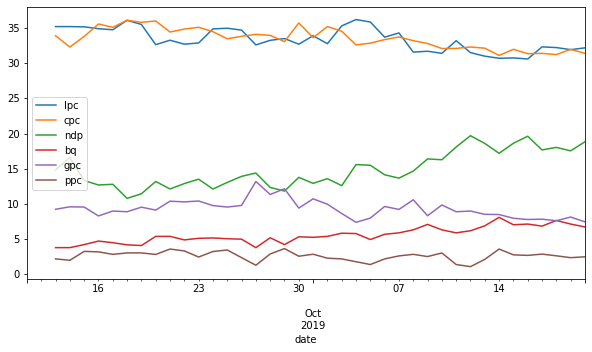

In [41]:
# We can also use pandas to plot
df[parties].resample('D', how='mean').plot()



### Anatomy of a Figure
![Anatomy of a Figure](https://matplotlib.org/3.1.1/_images/anatomy.png)


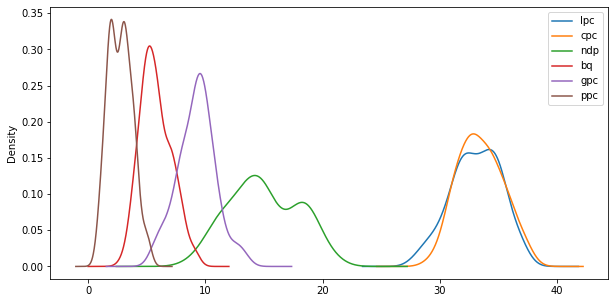

In [42]:
# We can look at the distributions for each party
df[parties].plot(kind='kde')


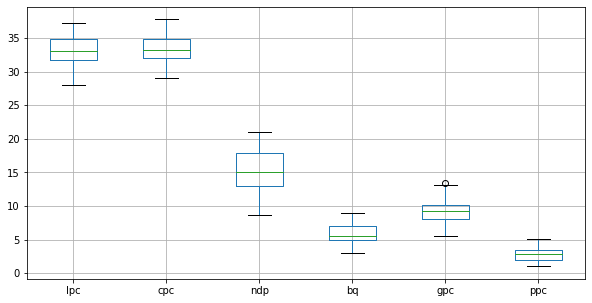

In [43]:
# Or do a simple box-plot
df[parties].boxplot()


In [44]:
# Let's look at missing values
df.isnull().mean()


source    0.000000
lpc       0.000000
cpc       0.000000
ndp       0.008547
bq        0.008547
gpc       0.008547
ppc       0.017094
method    0.000000
dtype: float64

In [45]:
# We can remove missing values
df.dropna()


,source,lpc,cpc,ndp,bq,gpc,ppc,method
date,,,,,,,,
2019-09-11,DART/Maru,32.0,35.0,15.0,6.0,8.0,2.0,online
2019-09-11,Forum Research,32.4,36.3,8.6,4.1,11.6,4.9,IVR
2019-09-13,Ipsos,35.0,35.0,14.0,4.0,9.0,2.0,online/telephone
2019-09-13,Nanos Research,35.4,32.8,15.7,3.6,9.5,2.4,telephone (rolling)
2019-09-14,Nanos Research,35.2,32.3,16.6,3.8,9.6,2.0,telephone (rolling)
...,...,...,...,...,...,...,...,...
2019-10-20,Campaign Research,31.4,31.3,17.8,6.6,9.1,2.7,online (rolling)
2019-10-20,EKOS,34.2,30.0,18.3,5.0,8.1,3.5,telephone/IVR
2019-10-20,Mainstreet Research,31.6,32.2,18.3,7.9,6.1,2.8,IVR


In [0]:
# We just lost half of our dataset...
# Maybe we should fill the missing values
tmp_df = df.fillna(method='ffill', limit=3).copy()
tmp_df.isnull().mean()

df = tmp_df


In [47]:
# Let's investigate which polling firms have been most active
df.source.value_counts()


Nanos Research         37
Mainstreet Research    29
Innovative Research     7
EKOS                    6
Forum Research          6
Ipsos                   6
Angus Reid              5
Abacus Data             5
Leger                   5
Campaign Research       5
DART/Maru               4
Research Co.            2
Name: source, dtype: int64

In [0]:
# Remove the firms that released less than 5 polls
tmp_mask = df.source.value_counts() >= 5
mask = tmp_mask.index[tmp_mask]

df = df[df.source.isin(mask)]


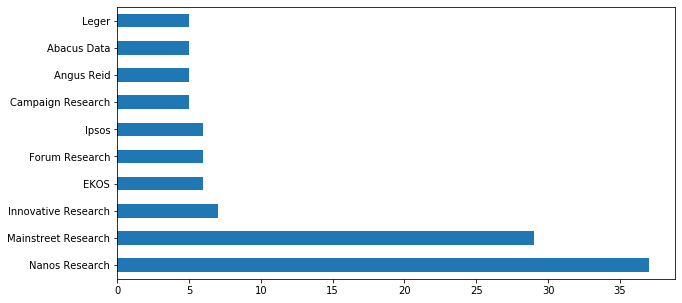

In [49]:
# Once again we could decide to visualize directly the result
df.source.value_counts().plot(kind='barh')


In [50]:
# Try to do grouped operations and see how did each of these firms portrayed the liberal party
df.groupby('source').lpc.describe().sort_values(by='mean')


,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
Angus Reid,5.0,30.200000,1.643168,29.0,29.000,30.00,30.00,33.0
Campaign Research,5.0,31.020000,1.188276,29.0,31.000,31.40,31.70,32.0
Forum Research,6.0,31.516667,2.183957,28.0,30.425,32.05,32.85,34.0
EKOS,6.0,32.050000,1.461164,30.5,31.050,31.60,33.05,34.2
Ipsos,6.0,32.833333,2.136976,30.0,31.250,33.00,34.75,35.0
Leger,5.0,33.200000,1.303840,31.0,33.000,34.00,34.00,34.0
Mainstreet Research,29.0,33.389655,2.101589,28.9,31.900,33.40,34.40,37.2
Abacus Data,5.0,33.600000,1.516575,32.0,32.000,34.00,35.00,35.0
Nanos Research,37.0,33.859459,1.685141,31.0,32.500,34.20,35.30,36.9


In [51]:
# We can also look at the means for all the parties
df.groupby('source')[parties].mean().sort_values('lpc')


,lpc,cpc,ndp,bq,gpc,ppc
source,,,,,,
Angus Reid,30.200000,35.000000,15.600000,6.600000,9.000000,3.200000
Campaign Research,31.020000,31.740000,17.240000,6.440000,9.640000,2.880000
Forum Research,31.516667,32.366667,13.683333,6.516667,10.483333,3.983333
EKOS,32.050000,32.066667,14.950000,5.033333,9.883333,4.066667
Ipsos,32.833333,34.500000,16.166667,5.666667,8.000000,2.166667
Leger,33.200000,32.800000,15.000000,6.000000,10.000000,3.000000
Mainstreet Research,33.389655,33.803448,13.224138,6.031034,9.148276,3.351724
Abacus Data,33.600000,32.800000,16.000000,5.600000,9.000000,2.000000
Nanos Research,33.859459,33.862162,15.413514,5.175676,9.302703,1.840541


In [52]:
# We can also apply custom functions by groups
z_score = lambda x: (x-x.mean()) / x.std()
df.reset_index().groupby('source')[parties].apply(z_score).head()


,lpc,cpc,ndp,bq,gpc,ppc
0,0.404465,1.355624,-1.192809,-1.498273,0.604738,1.050338
1,1.013894,0.267261,-0.935276,-1.107019,0.559017,-0.408248
2,0.914191,-0.615389,0.120454,-1.633702,0.129742,1.059954
3,0.795507,-0.905075,0.498860,-1.426337,0.195502,0.302112
4,0.544705,0.207020,-0.192582,-1.069045,1.259882,0.300376


In [53]:
# Most algorithms need you to shape the date in a long format
long_df = pd.melt(
    df.reset_index(),
    id_vars=['date', 'source'],
    value_vars=parties,
    var_name='party',
    value_name='share',
)

long_df.head()


,date,source,party,share
0,2019-09-11,Forum Research,lpc,32.4
1,2019-09-13,Ipsos,lpc,35.0
2,2019-09-13,Nanos Research,lpc,35.4
3,2019-09-14,Nanos Research,lpc,35.2
4,2019-09-15,Innovative Research,lpc,35.0


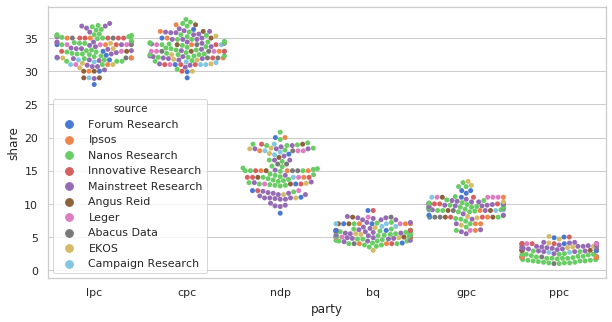

In [54]:
# Seaborn, a statistical data visualization library uses long-format
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

sns.swarmplot(
    x="party",
    y="share",
    hue="source",
    data=long_df,
)


In [55]:
# What if we need to add the sample size back?
new_df = long_df.merge(
    df[['method', 'source']].reset_index(),
    on=['date', 'source']
)

new_df.head()


,date,source,party,share,method
0,2019-09-11,Forum Research,lpc,32.4,IVR
1,2019-09-11,Forum Research,cpc,36.3,IVR
2,2019-09-11,Forum Research,ndp,8.6,IVR
3,2019-09-11,Forum Research,bq,4.1,IVR
4,2019-09-11,Forum Research,gpc,11.6,IVR


In [56]:
# We can also expand the dataframe back to a wide format
new_df = new_df.pivot_table(
    index=['date', 'source', 'method'],
    columns='party',
    values='share',
)

new_df.head()

party                                                bq   cpc  ...   ndp  ppc
date       source              method                          ...           
2019-09-11 Forum Research      IVR                  4.1  36.3  ...   8.6  4.9
2019-09-13 Ipsos               online/telephone     4.0  35.0  ...  14.0  2.0
           Nanos Research      telephone (rolling)  3.6  32.8  ...  15.7  2.4
2019-09-14 Nanos Research      telephone (rolling)  3.8  32.3  ...  16.6  2.0
2019-09-15 Innovative Research online               4.0  32.0  ...  14.0  4.0

[5 rows x 6 columns]